# **Ridge Regression**
- Temel Amaç, hata kareler toplamını(SSE) minimize eden katsayıları bu katsayıları bir ceza uygulayarak bulmaktır.

 **Özellikler**
- Aşırı Öğrenmeye karşı dirençlidir.
- Yanlıdır fakat varyansı düşüktür.(Bazen yanlı modeller daha çok tercih edilir.)
- Çok fazla parametre olduğunda EKK'ya göre daha iyidir. (EKK= En Küçük Kareler Yöntemi)
- Çok boyutluluk olaylarına karşı çözüm sunar.
- Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
- **Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.**

**Gerekli Kütüphaneler**

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

**Veri Seti**

In [251]:
df = pd.read_csv("./Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# burada yazdığımız verileri uçurduk drop ile
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 42) 


# Model Oluşturma

In [252]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [253]:
df.shape

(263, 20)

In [254]:
# train seti üzerinden modelimizi eğitiyoruz. test seti üzerinden ise modeli deniyoruz.
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [255]:
ridge_model

Ridge(alpha=0.1)

In [256]:
# bağımsız değişkenin katsayısı
ridge_model.coef_

array([[ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
         -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
         -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
         -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
        112.14640272, -99.80997876, -48.07152768]])

In [257]:
#  sabit katsayı değeri
ridge_model.intercept_

array([-4.57862691])

In [258]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [259]:
lambdalar = 10**np.linspace(10,-2,100, endpoint = True )*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [260]:
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.intercept_)

In [261]:
katsayilar

[array([489.00309697]),
 array([475.60442697]),
 array([460.0775107]),
 array([442.60192715]),
 array([423.55744169]),
 array([403.50111563]),
 array([383.09571433]),
 array([363.00308471]),
 array([343.77243809]),
 array([325.75594906]),
 array([309.07115652]),
 array([293.61038479]),
 array([279.0833432]),
 array([265.07551766]),
 array([251.10950794]),
 array([236.70331125]),
 array([221.42406032]),
 array([204.9361604]),
 array([187.04017657]),
 array([167.69625177]),
 array([147.02682054]),
 array([125.2992661]),
 array([102.89680562]),
 array([80.28901426]),
 array([58.00824673]),
 array([36.62817556]),
 array([16.73407131]),
 array([-1.12289742]),
 array([-16.48482738]),
 array([-29.04644035]),
 array([-38.69670577]),
 array([-45.52831976]),
 array([-49.81016676]),
 array([-51.92934305]),
 array([-52.31849127]),
 array([-51.38765481]),
 array([-49.47631112]),
 array([-46.83273978]),
 array([-43.6188408]),
 array([-39.93267562]),
 array([-35.83924936]),
 array([-31.40095967]),
 a

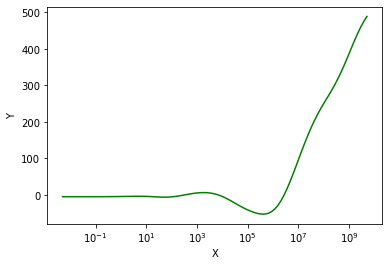

In [262]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar,"g")
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xscale("log")

# Tahmin

In [263]:
# modeli kurduk fit ettik
ridge_model = Ridge().fit(X_train,y_train)

In [274]:
# X_train setinin bağımsız değişkenlerini kullanarak tahmin etme işlemi yaptık ve y bağımlı değişkenlerini tahmin etttik.
y_predicted = ridge_model.predict(X_train)

In [265]:
# y nin tahmin edilen değerleri 
y_predicted[0:10]

array([[ 376.25245449],
       [ 803.38498121],
       [ 496.17669652],
       [ 112.69554648],
       [ 427.60020221],
       [1003.6309402 ],
       [ 153.45713944],
       [ 361.33880956],
       [ 483.29143665],
       [ 916.91439669]])

In [266]:
# y nin gerçek değerleri
y_train[0:10]

,Salary
183,125.0
229,1940.0
286,940.0
102,375.0
153,100.0
320,960.0
135,90.0
213,100.0
308,750.0
161,657.0


In [267]:
# train hatası 
RMSE = np.sqrt(mean_squared_error(y_train,y_predicted))
RMSE

289.34470696006565

In [268]:
# cv mse 
np.mean(-cross_val_score(ridge_model,X_train,y_train, cv=10, scoring= "neg_mean_squared_error"))

123477.15188321727

In [269]:
# cv rmse
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train, cv=10, scoring= "neg_mean_squared_error")))

351.3931585606317

In [270]:
#  X_test seti üzeriden y yi tahmin ettik 
y_predicted = ridge_model.predict(X_test)

In [272]:
# test hatası 
# burada y_predicted (tahmin edilen y) ile y_test(gerçek y değeri) ni karşılaştırarak hatayı hesapladık.
RMSE = np.sqrt(mean_squared_error(y_test,y_predicted))
RMSE

356.8082905730238

# Model Tuning

In [297]:
ridge_model = Ridge(1).fit(X_train,y_train)
y_predicted = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predicted))

356.8082905730238

In [298]:
np.random.randint(0,1000,100)

array([778, 549, 387, 121, 421, 422, 643, 322, 994, 248, 420,  11, 115,
       423, 348, 450, 368, 943,  69, 615, 248, 504, 162, 664, 433, 794,
        25, 258, 697, 655, 839, 477,  43, 440, 891, 282, 505, 884, 332,
       838, 230, 651, 251, 859,  96, 898, 200, 948, 302, 669, 528, 163,
       271, 764, 645, 239, 368, 371, 143, 893, 521,  72, 831, 213, 203,
        72, 352, 392,  11, 855, 162, 904, 908, 357, 609,  58, 990, 136,
       868, 261, 381, 991, 826, 318, 688, 493, 127, 458, 119, 204, 640,
       284, 862, 419, 548, 730, 602, 721, 411, 347])

In [299]:
lambdalar1 = np.random.randint(0,1000,100)

In [300]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [301]:
# lambdalar2 ye göre işlemler
ridgeCV = RidgeCV(alphas= lambdalar2, scoring= "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [302]:
# bu oluşturduğummuz model için optimum parametre 
ridgeCV.alpha_

0.7599555414764666

In [303]:
# fibak modeli 
ridge_tuning = Ridge(alpha= ridgeCV.alpha_).fit(X_train,y_train)

In [305]:
# Test hatası hesaplaması ridge_tuning e göre 
y_predicted = ridge_tuning.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predicted))

356.8583047271521

In [313]:
# lambdalar1 e göre işlemler 
ridgeCV = RidgeCV(alphas= lambdalar1, scoring= "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([514, 531, 420, 848, 608, 298, 748, 168, 842, 357,  31, 895, 824,
       895, 474,   1, 173, 251, 252, 394,  40, 140, 474, 188, 517, 806,
       239, 948, 444, 906, 140, 778, 804, 731, 590, 634, 351,  56, 468,
       572, 831, 614, 644, 647,  36, 207, 903,  60, 656, 819, 249, 985,
       290, 232, 686, 455, 385, 518, 143, 473,  69, 827, 704, 759, 522,
       114, 168, 984, 826, 155, 317, 675, 345, 214, 236, 578, 902, 487,
       148, 152, 395, 815, 842, 123, 849, 528, 841, 981, 448, 996,  24,
       364, 462,  74, 313, 919, 199, 173, 126,  60]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [314]:
ridgeCV.alpha_

1

In [315]:
ridge_tuning = Ridge(alpha= ridgeCV.alpha_).fit(X_train,y_train)

In [316]:
y_predicted = ridge_tuning.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predicted))

356.8082905730238